In [2]:
#importing necessary libraries
import pandas as pd
import glob
import os
import warnings
import time
import sys
import matplotlib.pyplot as plt
import seaborn as sns
# importing custom scripts for different functions
sys.path.append('scripts')  # add scripts to path
sys.path.append(os.path.abspath(".."))




# Ignore warnings
warnings.filterwarnings("ignore")

In [3]:
combined_data = pd.read_csv("combined.csv")
combined_data.head(10)

,Commodity,Classification,Grade,Sex,Market,Wholesale,Retail,Supply Volume,County,Date
0,Banana (Ripening),-,-,-,Mukuyu Market,-,50.00/Kg,NaN,Muranga,2026-02-11
1,Banana (Ripening),-,-,-,Mulot,70.00/Kg,100.00/Kg,1500.0,Bomet,2026-02-11
2,Banana (Ripening),-,-,-,Kitale Municipality Market,80.00/Kg,100.00/Kg,6000.0,Trans-Nzoia,2026-02-11
3,Banana (Ripening),-,-,-,Kerugoya,20.00/Kg,40.00/Kg,300.0,Kirinyaga,2026-02-10
4,Banana (Ripening),-,-,-,Bondeni,80.00/Kg,100.00/Kg,5000.0,Trans-Nzoia,2026-02-10
5,Banana (Ripening),-,-,-,Maua,20.00/Kg,30.00/Kg,1500.0,Meru,2026-02-10
6,Banana (Ripening),-,-,-,Wundanyi,-,80.00/Kg,1000.0,Taita-Taveta,2026-02-10
7,Banana (Ripening),-,-,-,Kitale Municipality Market,80.00/Kg,100.00/Kg,5000.0,Trans-Nzoia,2026-02-10
8,Banana (Ripening),-,-,-,Kabati - Muranga,-,40.00/Kg,NaN,Muranga,2026-02-09
9,Banana (Ripening),-,-,-,Kutus,17.00/Kg,20.00/Kg,24000.0,Kirinyaga,2026-02-09


In [4]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57010 entries, 0 to 57009
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Commodity       57010 non-null  object 
 1   Classification  57010 non-null  object 
 2   Grade           57010 non-null  object 
 3   Sex             57010 non-null  object 
 4   Market          57010 non-null  object 
 5   Wholesale       57010 non-null  object 
 6   Retail          57010 non-null  object 
 7   Supply Volume   39235 non-null  float64
 8   County          56991 non-null  object 
 9   Date            57010 non-null  object 
dtypes: float64(1), object(9)
memory usage: 4.3+ MB


**DATA CLEANING**

In [5]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57010 entries, 0 to 57009
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Commodity       57010 non-null  object 
 1   Classification  57010 non-null  object 
 2   Grade           57010 non-null  object 
 3   Sex             57010 non-null  object 
 4   Market          57010 non-null  object 
 5   Wholesale       57010 non-null  object 
 6   Retail          57010 non-null  object 
 7   Supply Volume   39235 non-null  float64
 8   County          56991 non-null  object 
 9   Date            57010 non-null  object 
dtypes: float64(1), object(9)
memory usage: 4.3+ MB


The next consequent step in this process is to carry out mapping of the ommodities in a clear manner. The essence of mapping in this process is to ensure a  consistency when analayzing  or visualizing data. we will rely on the .map() function each commodity in the combined _data is actually assigned its respective  category based on the dictionary.This step isneeded for easier aggregation,comparision and trend analysis later on of different commodity groups in  the dataset.(**Source ya the last statement here ni Chatgpt**)

In [6]:


commodity_category_mapping = {
    'Meat Beef': 'meat, fish and eggs',
    'Cabbages': 'vegetables and fruits',
    'Banana (Cooking)': 'vegetables and fruits',
    'Cowpea leaves (Kunde)': 'vegetables and fruits',
    'Cowpeas': 'pulses and nuts',
    'Dry Onions': 'vegetables and fruits',
    'Dry Maize': 'cereals and tubers',
    'Finger Millet': 'cereals and tubers',
    'Maize Flour': 'cereals and tubers',
    'Kales/Sukuma Wiki': 'vegetables and fruits',
    'Omena': 'meat, fish and eggs',
    'Red Irish potato': 'cereals and tubers',
    'Cow milk(Processd)': 'milk and dairy',
    'Beans Red Haricot (Wairimu)': 'pulses and nuts',
    'Red Sorghum': 'cereals and tubers',
    'Rice': 'cereals and tubers',
    'Banana (Ripening)': 'vegetables and fruits',
    'Spinach': 'vegetables and fruits',
    'Wheat': 'cereals and tubers',
    'Beans (Yellow-Green)': 'pulses and nuts'
}

#create sasa a new column ya categories
combined_data['Category'] = combined_data['Commodity'].map(commodity_category_mapping)

combined_data.head()






,Commodity,Classification,Grade,Sex,Market,Wholesale,Retail,Supply Volume,County,Date,Category
0,Banana (Ripening),-,-,-,Mukuyu Market,-,50.00/Kg,NaN,Muranga,2026-02-11,vegetables and fruits
1,Banana (Ripening),-,-,-,Mulot,70.00/Kg,100.00/Kg,1500.0,Bomet,2026-02-11,vegetables and fruits
2,Banana (Ripening),-,-,-,Kitale Municipality Market,80.00/Kg,100.00/Kg,6000.0,Trans-Nzoia,2026-02-11,vegetables and fruits
3,Banana (Ripening),-,-,-,Kerugoya,20.00/Kg,40.00/Kg,300.0,Kirinyaga,2026-02-10,vegetables and fruits
4,Banana (Ripening),-,-,-,Bondeni,80.00/Kg,100.00/Kg,5000.0,Trans-Nzoia,2026-02-10,vegetables and fruits


In [7]:
combined_data[combined_data['Category'].isna()]['Commodity'].unique()


array([], dtype=object)

In [8]:
print(combined_data['Commodity'].unique())

['Banana (Ripening)' 'Beans Red Haricot (Wairimu)' 'Meat Beef' 'Cabbages'
 'Banana (Cooking)' 'Cowpeas' 'Cowpea leaves (Kunde)' 'Dry Maize'
 'Dry Onions' 'Finger Millet' 'Maize Flour' 'Kales/Sukuma Wiki' 'Omena'
 'Red Irish potato' 'Red Sorghum' 'Rice' 'Spinach' 'Wheat'
 'Beans (Yellow-Green)']


In [9]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57010 entries, 0 to 57009
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Commodity       57010 non-null  object 
 1   Classification  57010 non-null  object 
 2   Grade           57010 non-null  object 
 3   Sex             57010 non-null  object 
 4   Market          57010 non-null  object 
 5   Wholesale       57010 non-null  object 
 6   Retail          57010 non-null  object 
 7   Supply Volume   39235 non-null  float64
 8   County          56991 non-null  object 
 9   Date            57010 non-null  object 
 10  Category        57010 non-null  object 
dtypes: float64(1), object(10)
memory usage: 4.8+ MB


In [10]:
# Dropping of column  "sex" and "grade" they are actually not  needed in our works 
combined_data.drop(columns=['Sex','Grade'], inplace=True, axis=1)

In [11]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57010 entries, 0 to 57009
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Commodity       57010 non-null  object 
 1   Classification  57010 non-null  object 
 2   Market          57010 non-null  object 
 3   Wholesale       57010 non-null  object 
 4   Retail          57010 non-null  object 
 5   Supply Volume   39235 non-null  float64
 6   County          56991 non-null  object 
 7   Date            57010 non-null  object 
 8   Category        57010 non-null  object 
dtypes: float64(1), object(8)
memory usage: 3.9+ MB


We are supposed to change the retail and wholesale prices into float values. However, each is attached to a unit of measurement, for example, maize measured in kilograms and milk measured in litres. 
The units will be seperated from the prices, added to another column, and the prices converted to float64 format.

In [12]:
# Extract the numeric values and units
combined_data['Unit'] = combined_data['Retail'].str.extract(r'([a-zA-Z/-]+)')  # Extract unit
combined_data['Retail'] = combined_data['Retail'].str.extract(r'([\d.]+)').astype(float)  # Extract number

combined_data['Wholesale'] = combined_data['Wholesale'].str.extract(r'([\d.]+)').astype(float)

Retail acts as our source in this scenario  hence we  extract the unit from it, the same step can actually be done cleanly from the wholesale bit 

Now lets work on the date column bit  and change it into the date-time format

In [13]:
combined_data['Date'] = pd.to_datetime(combined_data['Date'])
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57010 entries, 0 to 57009
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Commodity       57010 non-null  object        
 1   Classification  57010 non-null  object        
 2   Market          57010 non-null  object        
 3   Wholesale       45298 non-null  float64       
 4   Retail          54612 non-null  float64       
 5   Supply Volume   39235 non-null  float64       
 6   County          56991 non-null  object        
 7   Date            57010 non-null  datetime64[ns]
 8   Category        57010 non-null  object        
 9   Unit            57010 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 4.3+ MB


**Handling Outliers**

In [14]:
combined_data.describe()

,Wholesale,Retail,Supply Volume
count,45298.000000,54612.000000,3.923500e+04
mean,106.116650,153.973428,1.041572e+04
std,187.630483,394.559382,6.400056e+05
min,0.010000,0.010000,0.000000e+00
25%,40.000000,60.000000,4.200000e+02
50%,75.000000,100.000000,1.200000e+03
75%,120.000000,150.000000,3.200000e+03
max,14500.000000,22000.000000,1.000000e+08


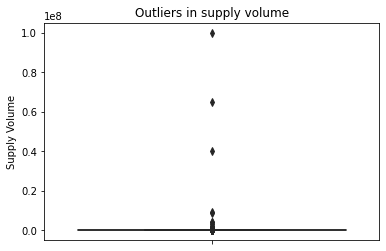

In [15]:
#Lets use a boxplot to actually  visualize the outliers in the Supply Volume domain
sns.boxplot(y=combined_data['Supply Volume'], color="green"). set(title ="Outliers in supply volume", ylabel="Supply Volume")
plt.show()

In [16]:
#lets find the no of outliers exceeding 100k
supply_number=combined_data['Supply Volume']>100000
supply_number.value_counts()

False    56868
True       142
Name: Supply Volume, dtype: int64

In [17]:
#do away with the outliers(drop them)
combined_data.drop(combined_data[combined_data['Supply Volume'] >100000].index , inplace=True)

In [18]:
supply_number=combined_data['Supply Volume']>100000
supply_number.value_counts()

False    56868
Name: Supply Volume, dtype: int64

**Dealing with Missing Values**

In [19]:
#Checking for Nulls
nan_percent = (combined_data .isna().sum()/ len(combined_data))*100
nan_percent

Commodity          0.000000
Classification     0.000000
Market             0.000000
Wholesale         20.589787
Retail             4.216783
Supply Volume     31.256594
County             0.033411
Date               0.000000
Category           0.000000
Unit               0.000000
dtype: float64

In [20]:
# Compute median values for each commodity
supply_medians = combined_data.groupby('Commodity')[['Supply Volume']].median()

# Print median values before imputing
print(supply_medians)

# Function to impute missing values with median
def impute_supply_median(row):
    if pd.isna(row['Supply Volume']):
        row['Supply Volume'] = supply_medians.loc[row['Commodity'], 'Supply Volume']
    return row

# Apply imputation
combined_data = combined_data.apply(impute_supply_median, axis=1)

                             Supply Volume
Commodity                                 
Banana (Cooking)                    1500.0
Banana (Ripening)                   1500.0
Beans (Yellow-Green)                1500.0
Beans Red Haricot (Wairimu)         1200.0
Cabbages                            3500.0
Cowpea leaves (Kunde)                300.0
Cowpeas                              820.0
Dry Maize                           5000.0
Dry Onions                          2500.0
Finger Millet                        650.0
Kales/Sukuma Wiki                    900.0
Maize Flour                         3924.0
Meat Beef                           1300.0
Omena                               1200.0
Red Irish potato                    3000.0
Red Sorghum                          650.0
Rice                                2000.0
Spinach                              460.0
Wheat                                600.0


In [21]:
nan_percent = (combined_data .isna().sum()/ len(combined_data))*100
nan_percent

Commodity          0.000000
Classification     0.000000
Market             0.000000
Wholesale         20.589787
Retail             4.216783
Supply Volume      0.000000
County             0.033411
Date               0.000000
Category           0.000000
Unit               0.000000
dtype: float64

In [22]:
combined_data=combined_data.dropna(axis=0).reset_index()

In [23]:
nan_percent = (combined_data .isna().sum()/ len(combined_data))*100
nan_percent

index             0.0
Commodity         0.0
Classification    0.0
Market            0.0
Wholesale         0.0
Retail            0.0
Supply Volume     0.0
County            0.0
Date              0.0
Category          0.0
Unit              0.0
dtype: float64

In [24]:
#Check for duplicates
combined_data.duplicated().value_counts()

False    42753
dtype: int64

In [25]:
combined_data.head()

,index,Commodity,Classification,Market,Wholesale,Retail,Supply Volume,County,Date,Category,Unit
0,1,Banana (Ripening),-,Mulot,70.0,100.0,1500.0,Bomet,2026-02-11,vegetables and fruits,/Kg
1,2,Banana (Ripening),-,Kitale Municipality Market,80.0,100.0,6000.0,Trans-Nzoia,2026-02-11,vegetables and fruits,/Kg
2,3,Banana (Ripening),-,Kerugoya,20.0,40.0,300.0,Kirinyaga,2026-02-10,vegetables and fruits,/Kg
3,4,Banana (Ripening),-,Bondeni,80.0,100.0,5000.0,Trans-Nzoia,2026-02-10,vegetables and fruits,/Kg
4,5,Banana (Ripening),-,Maua,20.0,30.0,1500.0,Meru,2026-02-10,vegetables and fruits,/Kg


**EXPLORATORY DATA ANALYSIS**

**Univariate Analysis**

**Analysis of distribution of supply volume**

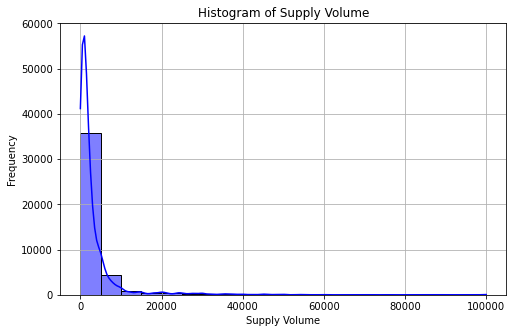

In [26]:

# Plotting histogram of supply volume to check for outliers
from scripts.visualization import plot_histogram

plot_histogram(combined_data, 'Supply Volume')